In [49]:
!pip install psaw

In [50]:
import pandas as pd
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)

In [51]:
from psaw import PushshiftAPI
api = PushshiftAPI()

In [61]:
api_request_generator = api.search_submissions(subreddit='wiedzmin',q='(Netflix)|(Hissrich)')

In [62]:
wiedzmin_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

/Users/Elena/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [63]:
wiedzmin_submissions.shape

(362, 93)

In [70]:
wiedzmin_submissions['date'] = pd.to_datetime(wiedzmin_submissions['created_utc'], utc=True, unit='s')


<AxesSubplot:xlabel='date'>

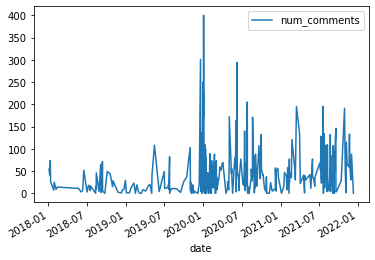

In [71]:
#Wiedzman subbreddit is dedicated to Witcher books and games. 
#This subbreddit is famous for being quite negative towrds Witcher TV Series. 
#Here I just wanted to see the correlation between date and the Netflix show or it's director related comments 
#The highest peak falls falls on the timeframe when the show was released. Another peaks include WitcherCon where trailer for the second season was released and AMA with the director of the show.
wiedzmin_submissions.plot(x="date", y=["num_comments"])